#                                             Analysis Covid-19 Data

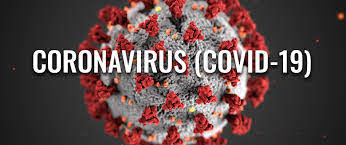

#### Team Member:  Zhen Zhang, Shuai Chang, Jianrong Weng

# Introduction:

The coronavirus 2019 disease (Covid-19) pandemic has created both an economic and a public health crisis. On the public health front, the spread of the Covid-19 has exhibited clearly geographic trends. It started in the densely populated urban centers and then spread to more rural parts of the country. This project can be divided into three parts. First, knowing the density of people who are confirmed with positive results in states with top ten most populated by processing data from datasets, In addition, we want to find them if there is a relationship between population. Second,  we would want to get the increasing rate of people who tested positive in each state monthly in order to find out if lockdown help decreases the rate of increase. Third, Seeing how covid-19 affects The United States economy.


For more information about COVID-19, please visit this webpage: https://www.who.int/health-topics/coronavirus#tab=tab_1 \
For more information about social impact caused by COVID-19, please visit this webside: https://www.un.org/development/desa/dspd/everyone-included-covid-19.html

# Part 1: Analysis the density of comfirm cases in the US
As the number of the covid-19 increasing rapidly in the United States. Team Want ot find out the top five states 
that have most covid-19 cases as well as the top five states with the highest increasing rate of positive cases. 
to see if the states have higher positive cases has high increasing rate of covid-19. In order to get to a conclusion,
we firstly read and get the data from all-state-history.csv file and then take out the related columns in the datasets,
put them into a new data frame. From different time periods, we decide to narrow down a specific day of the situation of each 
state. and we may sort the dataframe by the column positive which is the total positive cases in each state so that we are able
to see the top five states with most confirmed cases in all states as well as the top five states with least confirmed cases. 
Since we want to get the increasing rate of confirmed cases which is equal to increasing cases divided by the total number of 
positive cases, We need to add a new column named rate_of_increaing to the dataframe then get the top five states with the 
highest rate of increasing by sorting column rate_of_increaseing in dataframe with ascending order. In addition, we want to
see the death rate in each state as well. that will be the same method to get these data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import inf
import seaborn as seab
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
# read cvs file from the all-states-history  
content = pd.read_csv("all-states-history.csv")
# display first 10 or this dataframe
content.head()

,date,state,dataQualityGrade,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,...,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
0,2020-11-01,AK,A,83.0,83.0,1,NaN,NaN,NaN,98.0,...,604207.0,0,NaN,NaN,NaN,NaN,NaN,0,604207.0,0
1,2020-11-01,AL,A,2973.0,2767.0,6,206.0,20450.0,20450.0,967.0,...,1352580.0,6327,NaN,NaN,64859.0,NaN,NaN,0,1352580.0,6327
2,2020-11-01,AR,A+,1925.0,1758.0,0,167.0,7055.0,7055.0,639.0,...,1346972.0,0,NaN,21856.0,NaN,61220.0,NaN,0,1346972.0,0
3,2020-11-01,AS,D,0.0,NaN,0,NaN,NaN,NaN,NaN,...,1616.0,0,NaN,NaN,NaN,NaN,NaN,0,1616.0,0
4,2020-11-01,AZ,A+,5981.0,5663.0,2,318.0,21558.0,21558.0,875.0,...,1785767.0,14214,320223.0,NaN,NaN,NaN,1785767.0,14214,NaN,0


In [3]:
# read cvs file from the nst-est2019-alldata.csv and try to get
# total population of each state. 
population = pd.read_csv("nst-est2019-alldata.csv")
# display the population dateframe
population.head()

,SUMLEV,REGION,DIVISION,STATE,NAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,...,RDOMESTICMIG2019,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,RNETMIG2016,RNETMIG2017,RNETMIG2018,RNETMIG2019
0,10,0,0,0,United States,308745538,308758105,309321666,311556874,313830990,...,0.000000,2.493773,2.682083,2.636187,2.921500,3.260435,3.252788,2.871957,2.153911,1.818059
1,20,1,0,0,Northeast Region,55317240,55318443,55380134,55604223,55775216,...,-5.254530,0.887909,-0.038355,-0.469783,-0.986097,-2.061965,-2.490484,-1.837048,-2.134447,-2.859713
2,20,2,0,0,Midwest Region,66927001,66929725,66974416,67157800,67336743,...,-2.365881,-0.963930,-0.973943,-0.006924,-0.762969,-1.388437,-1.241784,-0.557370,-0.922755,-1.111173
3,20,3,0,0,South Region,114555744,114563030,114866680,116006522,117241208,...,3.261349,5.130513,5.850458,5.292073,6.161501,7.277358,7.150074,6.198168,5.225519,5.203720
4,20,4,0,0,West Region,71945553,71946907,72100436,72788329,73477823,...,0.614245,2.723344,3.062896,3.162262,4.026429,4.987285,5.261078,4.021194,3.044951,2.312083


In [4]:
population = population[['STATE','NAME', 'POPESTIMATE2019']]
population = population.rename(columns = {"POPESTIMATE2019" : "total_population"})
#dropped United States, Northest Region,  MidWestRegion,South region, west region
population = population.drop ([0,1,2,3,4])
population.sort_values( by=["NAME"] )
population.head()

,STATE,NAME,total_population
5,1,Alabama,4903185
6,2,Alaska,731545
7,4,Arizona,7278717
8,5,Arkansas,3017804
9,6,California,39512223


In [5]:
# sorted the population by the the number of population.
population.sort_values(by =["total_population"], inplace = True, ascending = False)
population.head()

,STATE,NAME,total_population
9,6,California,39512223
48,48,Texas,28995881
14,12,Florida,21477737
37,36,New York,19453561
43,42,Pennsylvania,12801989


In [6]:
# create a new dataframe of top five populated states.
data = {'State':  ['California', 'Texas','Florida','New York','Pennsylvania','Illinois','Ohio','Georgia','North Carolina','Michigan'],
        'positive_case': [922005, 900596,791997,507480,187176,378985,188738,350923,250332,158026],
        'total_population': [39512223, 28995881,21477737,19453561,12801989,12671821,11689100,10617423,10488084,9986857],
        }
df = pd.DataFrame (data, columns = ['State','positive_case','total_population'])
# get the density of top ten states people who confired positive case 
df['density_of_covid'] = df['positive_case']/df['total_population'] 
df.head()

,State,positive_case,total_population,density_of_covid
0,California,922005,39512223,0.023335
1,Texas,900596,28995881,0.031059
2,Florida,791997,21477737,0.036875
3,New York,507480,19453561,0.026087
4,Pennsylvania,187176,12801989,0.014621


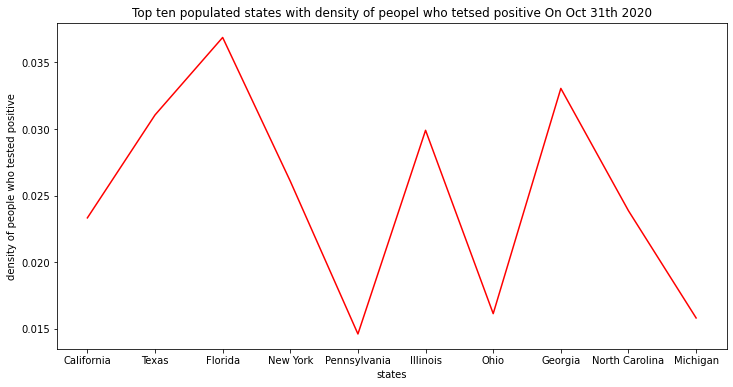

In [8]:
#convert to chart to see the result 
plt.plot(df.State, df.density_of_covid, color = "red")
plt.xlabel("states")
plt.ylabel("density of people who tested positive")
plt.rcParams["figure.figsize"] = [12,6]
plt.title("Top ten populated states with density of peopel who tetsed positive On Oct 31th 2020")
plt.show()

From the chart, we can see that top ten most populated states majority have hight density of people who tested positive for covid-19

In [9]:
# sort out nessary columns 
chart = content[['date','state','positive','negative','totalTestResults', 'death','recovered','deathIncrease', 'positiveIncrease']] 
# change appriately column name
chart = chart.rename(columns = {"totalTestResults" : "total"})
chart = chart.rename(columns = {"positiveIncrease" : "increasing_cases"})
chart = chart.rename(columns = {"deathIncrease" : "increase_death"})
# we would like only take the date is 2020-10-31 out of it 
# convert to a new dateframe
chart = chart[chart.date == '2020-10-31' ] 
chart.sort_values(by =['state'])
# display new dataframe that show that on That exactly date,increase cases, death cases and etc
chart.head()

,date,state,positive,negative,total,death,recovered,increase_death,increasing_cases
56,2020-10-31,AK,16355.0,587852.0,604207.0,82.0,7099.0,1,447
57,2020-10-31,AL,192285.0,1181958.0,1346253.0,2967.0,81005.0,35,1789
58,2020-10-31,AR,112190.0,1243490.0,1346972.0,1925.0,100067.0,25,1316
59,2020-10-31,AS,0.0,1616.0,1616.0,0.0,NaN,0,0
60,2020-10-31,AZ,245946.0,1531423.0,1771553.0,5979.0,41159.0,45,1901


In [10]:
#add one colmun named rate_of_positive and, 
#get the increasing rate of the positive case 
chart['rate_of_positive'] = chart['increasing_cases'] /chart['positive']
chart['rate_of_death'] = chart['increase_death'] /chart['death']
# sort the dateframe by the total number of positive cases in the states.
chart.sort_values(by =['total'], inplace = True, ascending = False)
chart.head()

,date,state,positive,negative,total,death,recovered,increase_death,increasing_cases,rate_of_positive,rate_of_death
61,2020-10-31,CA,922005.0,17680312.0,18602317.0,17626.0,NaN,55,5087,0.005517,0.003120
93,2020-10-31,NY,507480.0,14020238.0,14527718.0,25807.0,79717.0,3,2049,0.004038,0.000116
66,2020-10-31,FL,791997.0,5334795.0,9979348.0,16969.0,NaN,42,2283,0.002883,0.002475
103,2020-10-31,TX,900596.0,7253637.0,8154233.0,18024.0,782006.0,90,7145,0.007934,0.004993
72,2020-10-31,IL,416559.0,7319545.0,7736104.0,10050.0,NaN,56,7899,0.018962,0.005572


In [11]:
# copy the dateframe and sort the copied dateframe by the number of death with deacsending order
# in order to get top five states that have the most deaths.  
chart_new = chart
chart_new.sort_values(by = ['death'], inplace = True, ascending = False)
chart_new.head()

,date,state,positive,negative,total,death,recovered,increase_death,increasing_cases,rate_of_positive,rate_of_death
93,2020-10-31,NY,507480.0,14020238.0,14527718.0,25807.0,79717.0,3,2049,0.004038,0.000116
103,2020-10-31,TX,900596.0,7253637.0,8154233.0,18024.0,782006.0,90,7145,0.007934,0.004993
61,2020-10-31,CA,922005.0,17680312.0,18602317.0,17626.0,NaN,55,5087,0.005517,0.003120
66,2020-10-31,FL,791997.0,5334795.0,9979348.0,16969.0,NaN,42,2283,0.002883,0.002475
90,2020-10-31,NJ,237886.0,4418220.0,4656106.0,16350.0,37127.0,11,1363,0.005730,0.000673


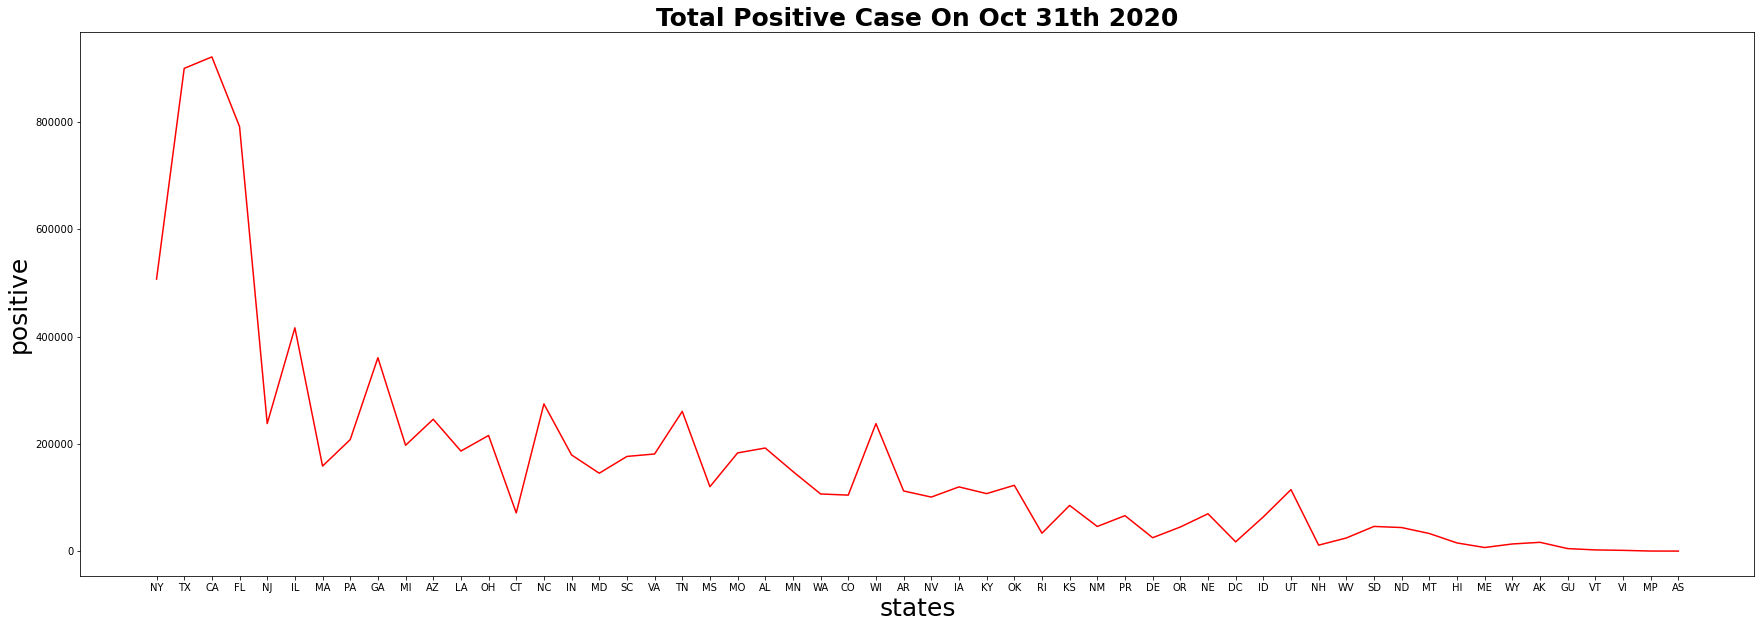

In [13]:
# get the chart of total positive cases in each states.
plt.plot(chart.state, chart.positive, color = "red")
plt.xlabel("states", size = 25)
plt.ylabel("positive", size = 25)
plt.rcParams["figure.figsize"] = [30,10]
plt.title("Total Positive Case On Oct 31th 2020", size=25, weight='bold')
plt.show()

As we can see from above, CA, NY, FL, TX, Il are the top five states which have the most positive cases in the United States.On the other hand, WY,GU,VI,MP,AS are the top five states that have the lest positive cases in all state.

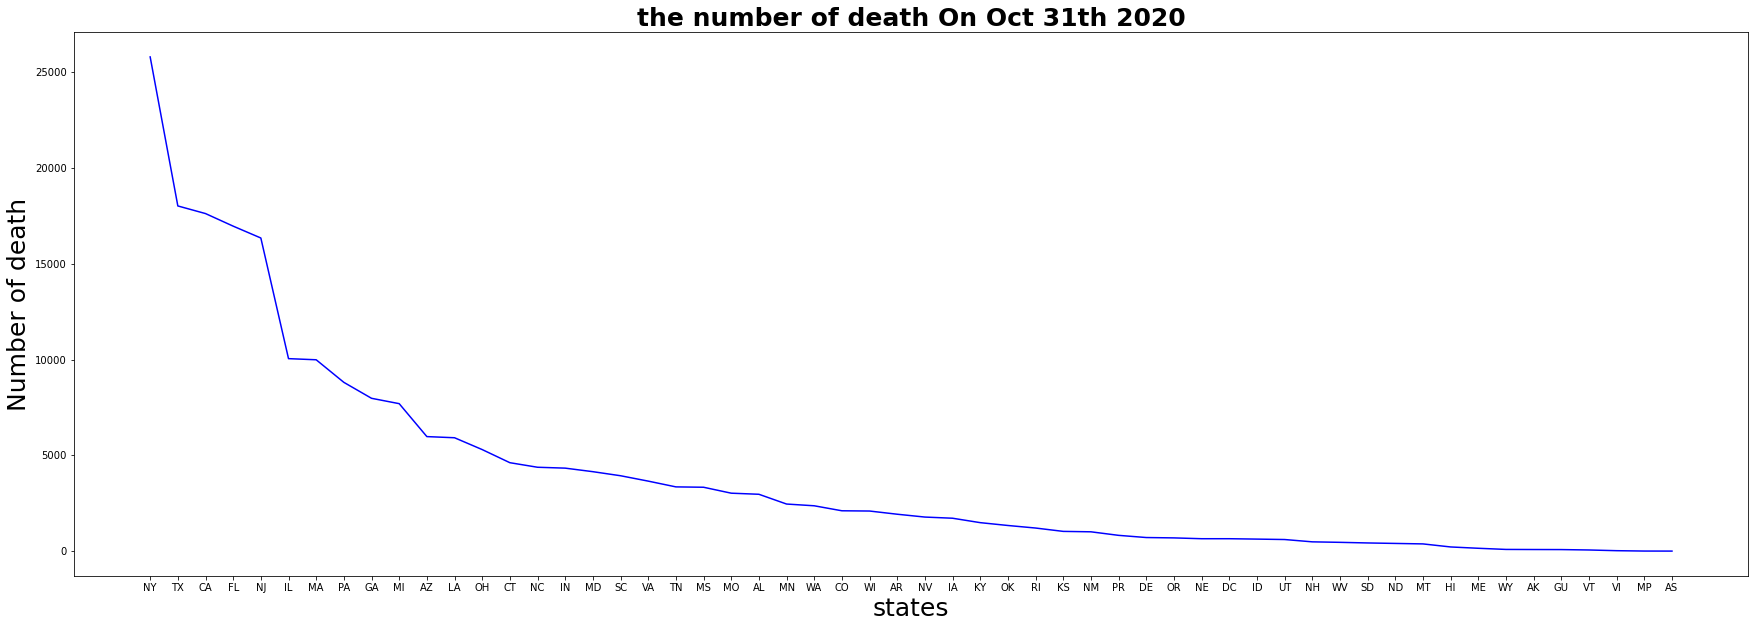

In [14]:
# get the chart of the number of death in each states.
plt.plot(chart_new.state, chart_new.death, color = "blue")
plt.xlabel("states", size = 25)
plt.ylabel("Number of death", size = 25)
plt.rcParams["figure.figsize"] = [30,10]
plt.title("the number of death On Oct 31th 2020", size=25, weight='bold')
plt.show()

Accouding to the chart, we can get that NY, TX, CA, ,NJ, FL are top five states with most number of death, meanwhile GU, VT,VI MP, and AS are the top five states with least number of death.

In [15]:
# sort the dataframes by the increasing rate of positives cases. 
chart.sort_values(by =['rate_of_positive'], inplace = True, ascending = False)
chart.head()

,date,state,positive,negative,total,death,recovered,increase_death,increasing_cases,rate_of_positive,rate_of_death
87,2020-10-31,ND,43916.0,250148.0,832109.0,400.0,35533.0,0,1433,0.032630,0.000000
101,2020-10-31,SD,45992.0,213540.0,259532.0,425.0,31194.0,10,1433,0.031158,0.023529
56,2020-10-31,AK,16355.0,587852.0,604207.0,82.0,7099.0,1,447,0.027331,0.012195
85,2020-10-31,MT,32801.0,466114.0,498915.0,375.0,21353.0,11,885,0.026981,0.029333
109,2020-10-31,WI,237870.0,1826636.0,3289120.0,2092.0,175096.0,63,5808,0.024417,0.030115


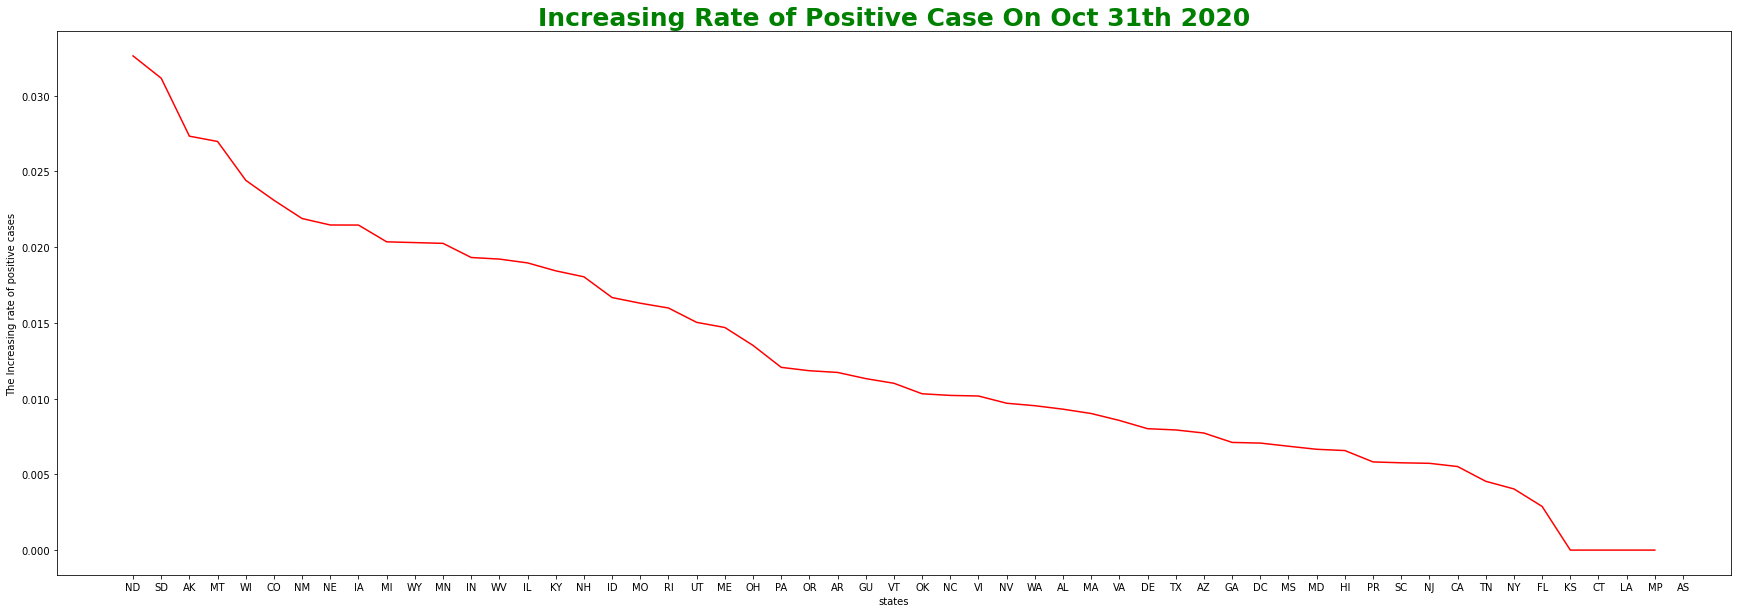

In [16]:
# showing the increasing rate of positve cases in each state. 
plt.plot(chart.state, chart.rate_of_positive, color= "red")
plt.xlabel("states")
plt.ylabel("The Increasing rate of positive cases")
plt.rcParams["figure.figsize"] = [30,10]
plt.title("Increasing Rate of Positive Case On Oct 31th 2020", size=25, weight='bold',color ='green')
plt.show()

As we can see from abover chart, ND, SD, AK,MT, WI are states with the largetst increasing rate of positive case. On the other hand,KS, CT, LA, MP, AS are states with the lowest increasing rate of positive cases 

In [17]:
# sort the dataframes by the increasing rate of death cases. 
chart.sort_values(by =['rate_of_death'], inplace = True, ascending = True)
chart.head()

,date,state,positive,negative,total,death,recovered,increase_death,increasing_cases,rate_of_positive,rate_of_death
87,2020-10-31,ND,43916.0,250148.0,832109.0,400.0,35533.0,0,1433,0.032630,0.0
63,2020-10-31,CT,71207.0,2217377.0,2288584.0,4616.0,9800.0,0,0,0.000000,0.0
74,2020-10-31,KS,85181.0,557601.0,642782.0,1029.0,2659.0,0,0,0.000000,0.0
64,2020-10-31,DC,17266.0,496986.0,514130.0,646.0,13348.0,0,122,0.007066,0.0
92,2020-10-31,NV,100763.0,707724.0,1253083.0,1777.0,2409.0,0,977,0.009696,0.0


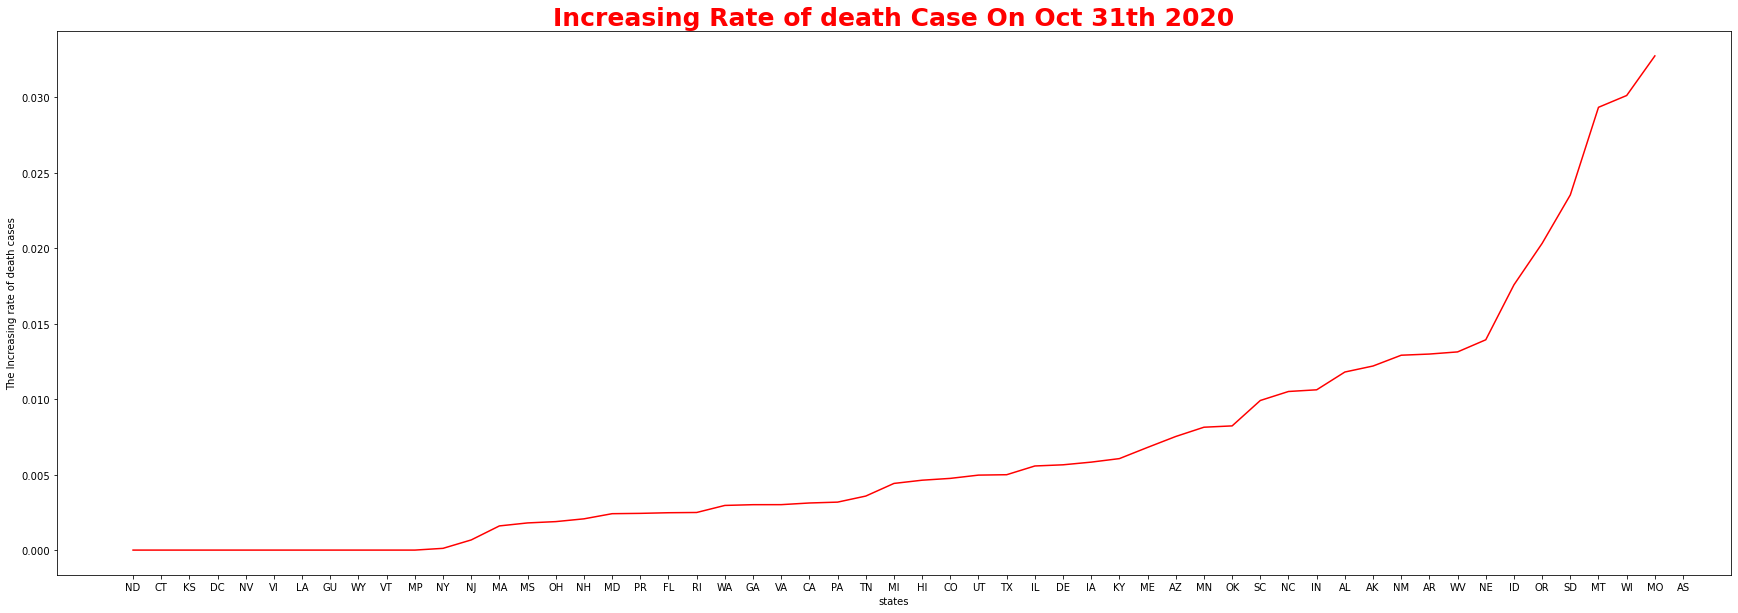

In [18]:
# showing the increasing rate of death cases in each state. 
plt.plot(chart.state, chart.rate_of_death, color= "red")
plt.xlabel("states")
plt.ylabel("The Increasing rate of death cases")
plt.rcParams["figure.figsize"] = [30,10]
plt.title("Increasing Rate of death Case On Oct 31th 2020", size=25, weight='bold',color ='red')
plt.show()

The states with larger population tends to have a big density of people who tested positive California and floriada are very good example to interpret it. As we can see from the dataframe and from the chart, ND,SD,AK,MT,WI are the top five states which have the most positive cases in the United States. on the other hand, KS, CT, LA, MP, AS are the top five states that have the lest positive cases in all state. which drop to my step one conlusion which is Higher positive cases number doesn't mean higher incresaing rate of positive cases. Instead, we are able to see that states with higher number of confirmed case tend to have a lower rate_of_increasing positive cases. when it comes to the death, NY, TX, CA, FL, NJ are the top five states with most of death.SD, MT,WI,MO, AS. has the lowest rate of death in the states.

# Part II: Analysis of the increasing confirmed cases across each state in the US.


In the first part of our project, my team member has shown the density of the people who confirmed
in each state. In the second part, we are focusing on analyzing the increasing rate of the confirmed
cases across each state. Especially, I will compare the increasing rate changes before and after “lock
down”. As the most report has shown that the time period of lockdown is between March to May,
therefore, we will be using the different plots to show the result of the data.

## Data Collection

The data we are using can be find from CDC website. To acess the date please visit
https://covid.cdc.gov/covid-data-tracker/#cases_casesper100klast7days

### Note: The data we are using are from January to November. For more information please visit the CDC website above

In [19]:
# Read Data of national history
data = pd.read_csv("national-history.csv")
national=pd.DataFrame(data)
# Drop table we do not need
national.drop(['inIcuCumulative','inIcuCurrently','hospitalizedIncrease','hospitalizedCurrently',\
               'hospitalizedCumulative','onVentilatorCumulative','onVentilatorCurrently'],axis=1,inplace=True)
#Drop data from Novenber since the date is not complete
national.drop(national.head(1).index,inplace=True)
national.head()

,date,death,deathIncrease,negative,negativeIncrease,positive,positiveIncrease,recovered,states,totalTestResults,totalTestResultsIncrease
1,2020-10-31,222319.0,963,120100805,1039157,9078223,90592,3612517.0,56,146168145,1373918
2,2020-10-30,221356.0,933,119061648,980084,8987631,97080,3578452.0,56,144794227,1362376
3,2020-10-29,220423.0,1049,118081564,1008042,8890551,88452,3554336.0,56,143431851,1325104
4,2020-10-28,219374.0,1025,117073522,797077,8802099,78661,3518140.0,56,142106747,1085647
5,2020-10-27,218349.0,931,116276445,818919,8723438,73096,3487666.0,56,141021100,1080760


### reload all state data and drop table we do not need to later anylisis

In [20]:
# Read Data of all states history
data1 = pd.read_csv("all-states-history.csv")
state=pd.DataFrame(data1)
# Drop the columns we do not need
state.drop(['dataQualityGrade','deathProbable','hospitalized','hospitalizedCumulative','hospitalizedCurrently',\
            'hospitalizedIncrease','inIcuCumulative','inIcuCurrently','negativeTestsAntibody',\
            'negativeTestsPeopleAntibody','negativeTestsViral','onVentilatorCumulative','onVentilatorCurrently',\
            'positiveCasesViral','positiveScore','positiveTestsAntibody','positiveTestsAntigen',\
            'positiveTestsPeopleAntibody','positiveTestsPeopleAntigen','positiveTestsViral','totalTestEncountersViral',\
            'totalTestEncountersViralIncrease','totalTestsAntibody','totalTestsAntigen','totalTestsPeopleAntibody',\
            'totalTestsPeopleAntigen','totalTestsPeopleViral','totalTestsPeopleViralIncrease'],axis=1,inplace=True)
state.head()

,date,state,death,deathConfirmed,deathIncrease,negative,negativeIncrease,positive,positiveIncrease,recovered,totalTestResults,totalTestResultsIncrease,totalTestsViral,totalTestsViralIncrease
0,2020-11-01,AK,83.0,83.0,1,587852.0,0,16705.0,350,7104.0,604207.0,0,604207.0,0
1,2020-11-01,AL,2973.0,2767.0,6,1187341.0,5383,193985.0,1700,81005.0,1352580.0,6327,1352580.0,6327
2,2020-11-01,AR,1925.0,1758.0,0,1243490.0,0,112190.0,0,100067.0,1346972.0,0,1346972.0,0
3,2020-11-01,AS,0.0,NaN,0,1616.0,0,0.0,0,NaN,1616.0,0,1616.0,0
4,2020-11-01,AZ,5981.0,5663.0,2,1544171.0,12748,247473.0,1527,41398.0,1785767.0,14214,NaN,0


The data I read from the national-history.csv show the information I need later. Since I only want to calculate the confirmed cases, I dropped some columns that not help to understand my purpose.The data read from all-states-history.csv file that content all information from each state every day. I have not done with data processing so the data may looks mess for now.

## Data Processing

In [21]:
# Rearrange the data sort by date ascending. 
national=national.sort_values(ascending=True, by=["date"])
# Now I need to calculate the confirmed cases and make the table more readable
# Here I use positiveIncrease to calculate the comfirm rate
national["comfirm rate"]=national["positiveIncrease"].pct_change(axis=0,fill_method='bfill')
# Change all inf result to NAN
national=national.replace([np.inf, -np.inf], np.nan)
# Rearrange the table
national=national[["date","states","death","negative","positive","positiveIncrease","recovered","totalTestResults","comfirm rate"]]
# Replace all NAN to 0
for columns in national:
    national[columns]=national[columns].fillna(0)
# New Columns for month and day to use for later 
national['month'] = pd.DatetimeIndex(national['date']).month
national['day'] = pd.DatetimeIndex(national['date']).day
national.head()

,date,states,death,negative,positive,positiveIncrease,recovered,totalTestResults,comfirm rate,month,day
284,2020-01-22,2,0.0,0,0,0,0.0,1,0.0,1,22
283,2020-01-23,2,0.0,0,0,0,0.0,2,0.0,1,23
282,2020-01-24,2,0.0,0,0,0,0.0,2,0.0,1,24
281,2020-01-25,2,0.0,0,0,0,0.0,2,0.0,1,25
280,2020-01-26,2,0.0,0,0,0,0.0,2,0.0,1,26


In [22]:
# Mult data to make it easier to use later. 
state=state.sort_values(ascending=True, by=["state","date"])
state["comfirm rate"]=state["positiveIncrease"].pct_change(axis=0,fill_method='bfill')
# Change all inf result to NAN
state=state.replace([np.inf, -np.inf], np.nan)
state=state[["date","state","death","negative","positive","positiveIncrease","recovered","totalTestResults","comfirm rate"]]
# Replace all NAN to 0
for columns in state:
    state[columns]=state[columns].replace(np.nan, 0)
# New Columns for month and day to use for later 
state['month'] = pd.DatetimeIndex(state['date']).month
state['day'] = pd.DatetimeIndex(state['date']).day
state.head()

,date,state,death,negative,positive,positiveIncrease,recovered,totalTestResults,comfirm rate,month,day
13395,2020-03-06,AK,0.0,8.0,0.0,0,0.0,8.0,0.0,3,6
13344,2020-03-07,AK,0.0,12.0,0.0,0,0.0,12.0,0.0,3,7
13293,2020-03-08,AK,0.0,14.0,0.0,0,0.0,14.0,0.0,3,8
13242,2020-03-09,AK,0.0,23.0,0.0,0,0.0,23.0,0.0,3,9
13191,2020-03-10,AK,0.0,23.0,0.0,0,0.0,23.0,0.0,3,10


# Exploratory analysis & Data Viz

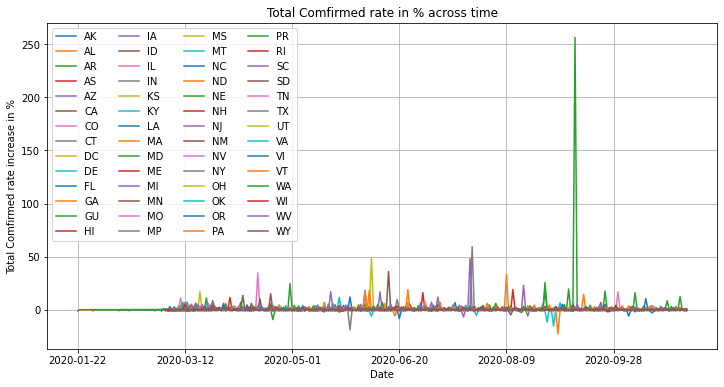

In [24]:
result = state.pivot(index='state', columns='date',values='comfirm rate')
result.T.plot(grid = True)
plt.xlabel("Date")
plt.ylabel("Total Comfirmed rate increase in %")
plt.title("Total Comfirmed rate in % across time")
plt.legend(loc=2,ncol=4)
plt.rcParams["figure.figsize"] = [12,6]

Based on the plot above, we can see that across time, There are some state total confirmed increasing rate is very high, there is one approximate 250% which means that most of the time the increasing rate of that state is positive. However, the rest of the data are stable at around 0-50%. Which we can predict that for most states the confirmed rate had under control.

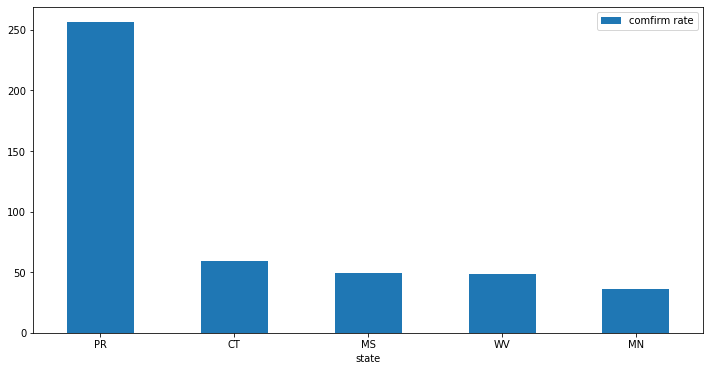

In [25]:
# Find the highest 5 confirmed rate
top5=state.nlargest(5, 'comfirm rate')
top5.plot.bar(x='state', y='comfirm rate', rot=0)

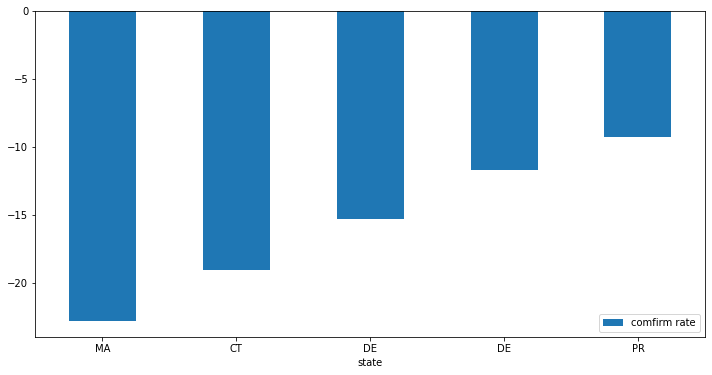

In [26]:
# Find the lowest 5 confirmed rate
low5=state.nsmallest(5, 'comfirm rate')
low5.plot.bar(x='state', y='comfirm rate', rot=0)

From the plot we can see that states like Puerto Rico have very high comfirmed rate overtime. And states like Massachusetts have the lowest comfirmed rate overtime.

Text(0, 0.5, 'Comfirmed rate')

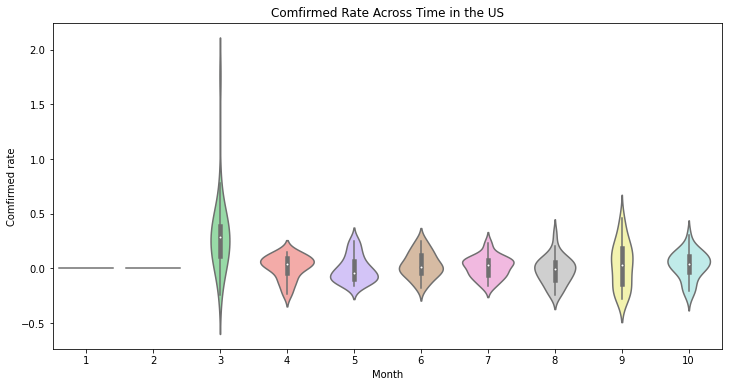

In [29]:
# Plot the data
plt.figure(figsize=(12, 6))
seab.violinplot(national['month'], national["comfirm rate"], data=national, palette="pastel")
plt.title("Comfirmed Rate Across Time in the US") 
plt.xlabel("Month")
plt.ylabel("Comfirmed rate") 

From the plot, we can see that the confirmed rate of the US had reached 2%. which is the time The World Health Organization (WHO) on March 11, 2020, has declared the novel coronavirus (COVID-19) outbreak a global pandemic. Then from the middle of March, the government had released the lockdown notice until late May. From the data, I use I can predict that the confirmed rates dropped very fast during the lockdown time.

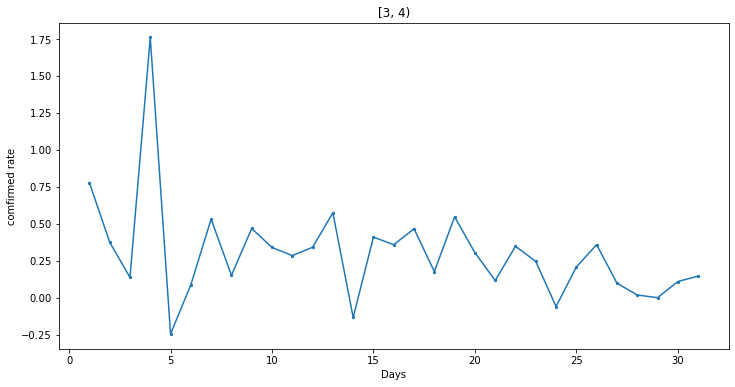

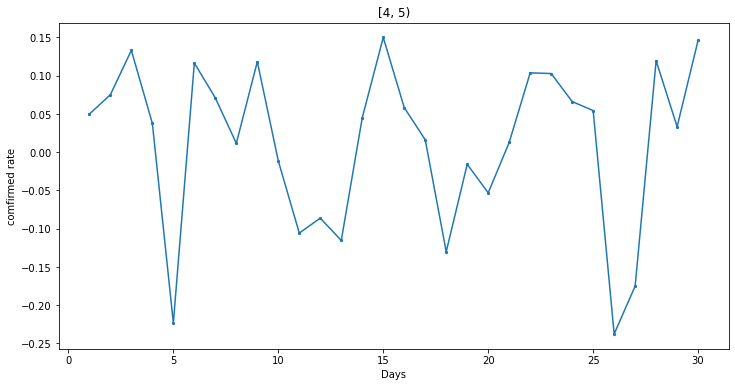

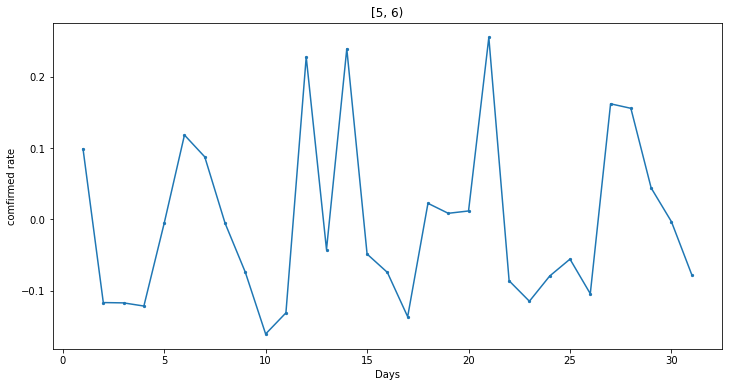

In [31]:
#Cut off the month during lockdown 
bins = [3, 4, 5, 6]
national['range'] = pd.cut(national['month'], bins, right=False)
for b, groups in national.groupby('range'):
    #Save data to np array to use
    X = np.array(groups['day']).reshape(-1, 1)
    y = np.array(groups['comfirm rate']).reshape(-1, 1) 
    groups.plot(kind='scatter',x='day',y='comfirm rate',\
    title=b, marker='.',figsize=(12, 6))
    plt.plot(X, y)
    plt.title(b) 
    plt.xlabel("Days")
    plt.ylabel("comfirmed rate")

I took the 4 months from data, only keep the date from March to June. We can see that in the first month the confirmed rate had reached 1.75% per day, then the lockdown begins the confirmed rates continues to drop. In April, the confirmed rates had dropped below 0.15% per day, and in May the confirmed rate had stead around between 0.3 to -0.1. I can say that the lockdown decision made by the government is very successful.



# Part3: Now, In this part of the tutorial, I am interested to see how does COVID-19 impacts the US stock market. 

For those who have experience in the stock market, we all aware that the stock market has experienced significant change during the COVID period. The COVID has caused fatal harm to the overall economy. One of the ways to analyze the relationship between the US economy and COVID is by looking at the stock market. I am interested to know if the COVID is actually one of the major factors that impact the whole stock market. In another word, was COVID bring a negative impact on the stock market. Therefore, I want to find the answer by looking at the data. However, it is difficult to include the stock of ALL the companies in the US. As the result, I would like to analyze the two most representative stocks, "S&P 500"(The S&P 500 Index or the Standard & Poor's 500 Index is a market-capitalization-weighted index of 500 of the largest publicly-traded companies in the U.S.) and "Dow Jones" (Dow Jones & Company is one of the largest business and financial news companies in the world.) to help represent the trend of US stock.

link for more information about S&P 500: https://www.investopedia.com/terms/s/sp500.asp

link for more information about Dow Jones: https://www.investopedia.com/ask/answers/who-or-what-is-dow-jones/

In [32]:
# read csv file for S&P 500 stock
SP_df = pd.read_csv("SP500.csv")
# display to see how SP500 dataframe looks like
SP_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-11-04,3078.959961,3085.199951,3074.870117,3078.270020,3078.270020,4146850000
1,2019-11-05,3080.800049,3083.949951,3072.149902,3074.620117,3074.620117,4486130000
2,2019-11-06,3075.100098,3078.340088,3065.889893,3076.780029,3076.780029,4458190000
3,2019-11-07,3087.020020,3097.770020,3080.229980,3085.179932,3085.179932,4144640000
4,2019-11-08,3081.250000,3093.090088,3073.580078,3093.080078,3093.080078,3499150000


In [33]:
# read csv file for Dow Jones stock
dow_df = pd.read_csv("Dow.csv")
# display to see how SP500 dataframe looks like
dow_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-11-04,27402.060547,27517.580078,27402.060547,27462.109375,27462.109375,273030000
1,2019-11-05,27500.230469,27560.359375,27453.550781,27492.630859,27492.630859,286350000
2,2019-11-06,27502.740234,27526.050781,27407.810547,27492.560547,27492.560547,237910000
3,2019-11-07,27590.160156,27774.669922,27590.160156,27674.800781,27674.800781,259020000
4,2019-11-08,27686.199219,27694.949219,27578.970703,27681.240234,27681.240234,221440000


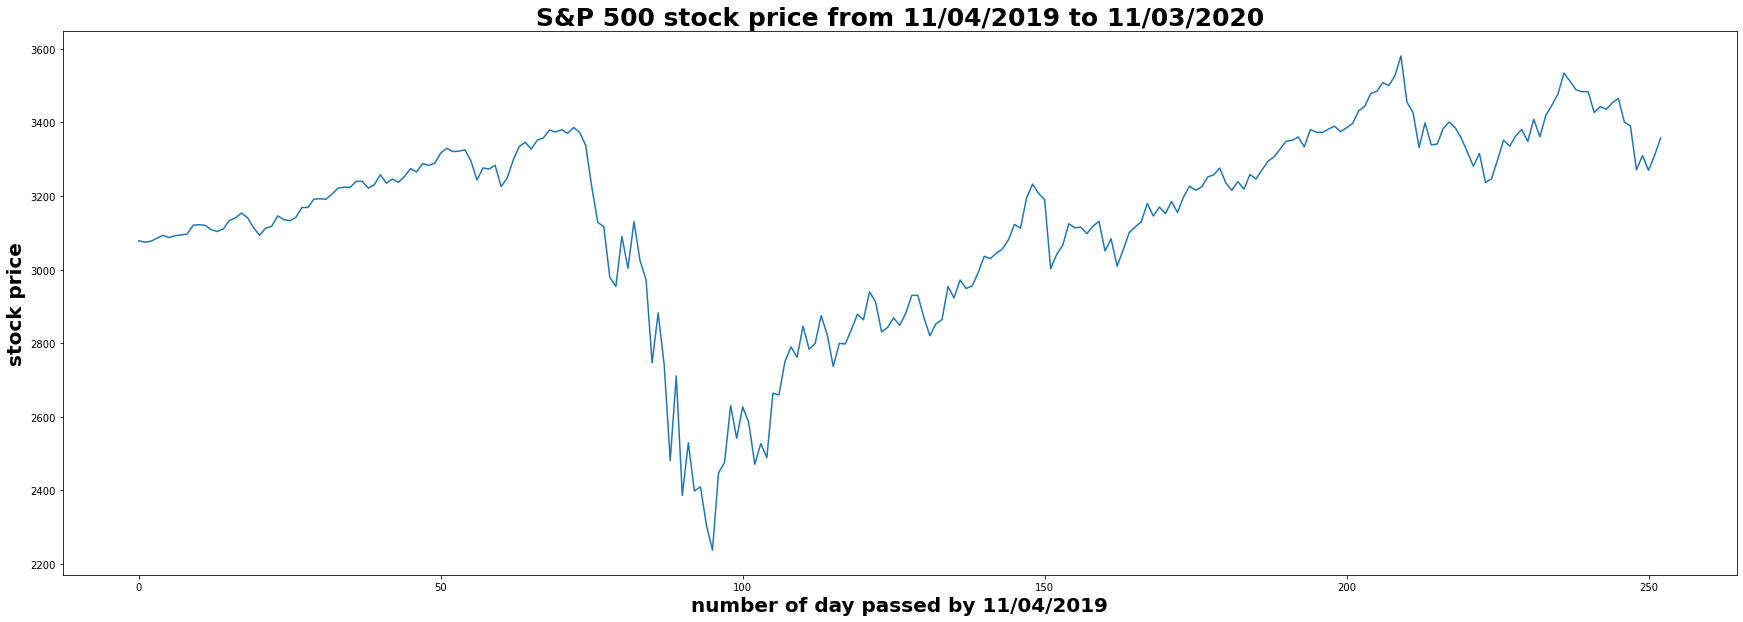

In [35]:
plt.plot(SP_df['Adj Close'])

# note that stock market only open during weekday(Monday - Friday), there are only 253 days in a year. 
plt.xlabel("number of day passed by 11/04/2019", size=20, weight='bold')
plt.ylabel("stock price", size=20, weight='bold')
plt.rcParams["figure.figsize"] = [30,10]
plt.title("S&P 500 stock price from 11/04/2019 to 11/03/2020", size=25, weight='bold')
plt.show()

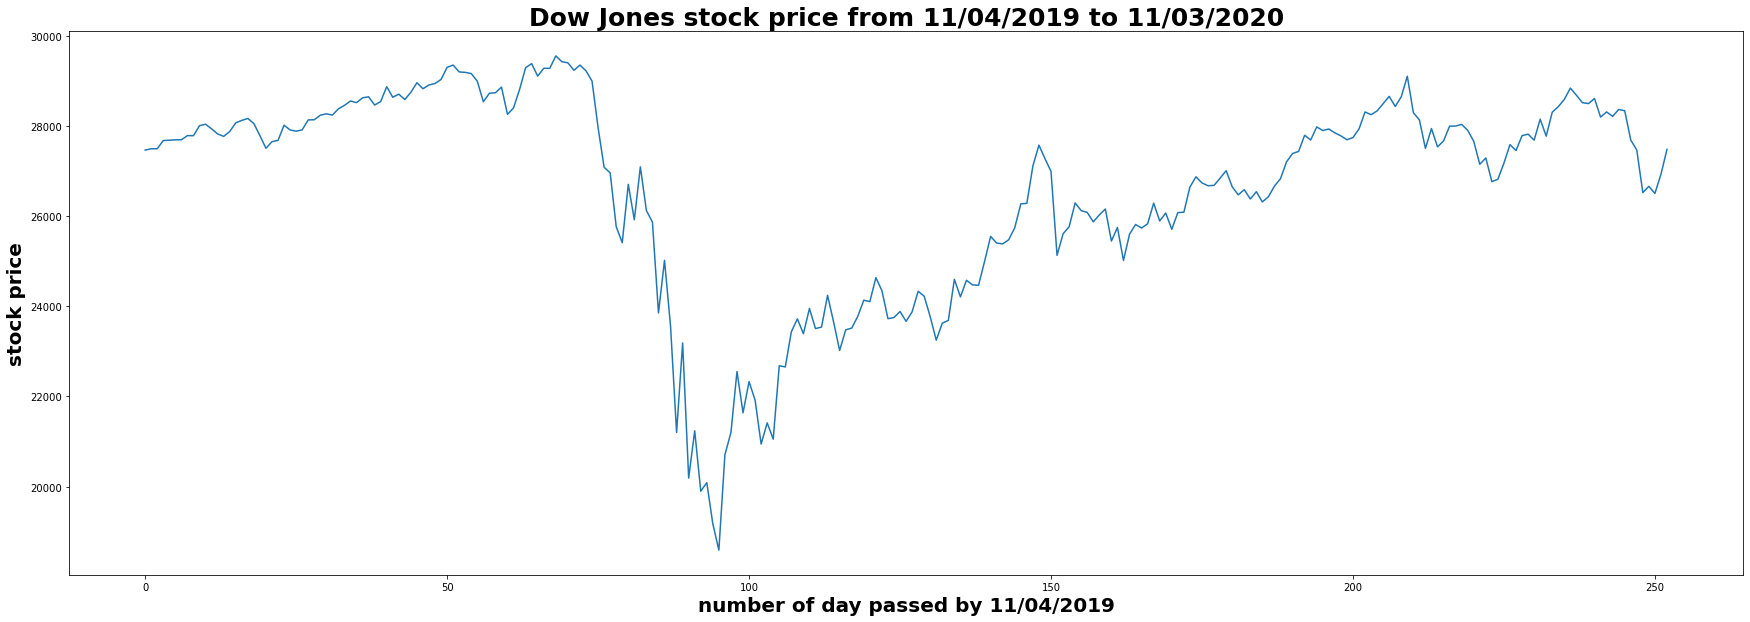

In [36]:
plt.plot(dow_df['Adj Close'])

# note that stock market only open during weekday(Monday - Friday), there are only 253 days in a year. 
plt.xlabel("number of day passed by 11/04/2019", size=20, weight='bold')
plt.ylabel("stock price", size=20, weight='bold')
plt.rcParams["figure.figsize"] = [30,10]
plt.title("Dow Jones stock price from 11/04/2019 to 11/03/2020", size=25, weight='bold')
plt.show()

It's difficult to see the change each day by directly looking at adj close price of stock. Let's see the stock price change in percentage to have a better visualization

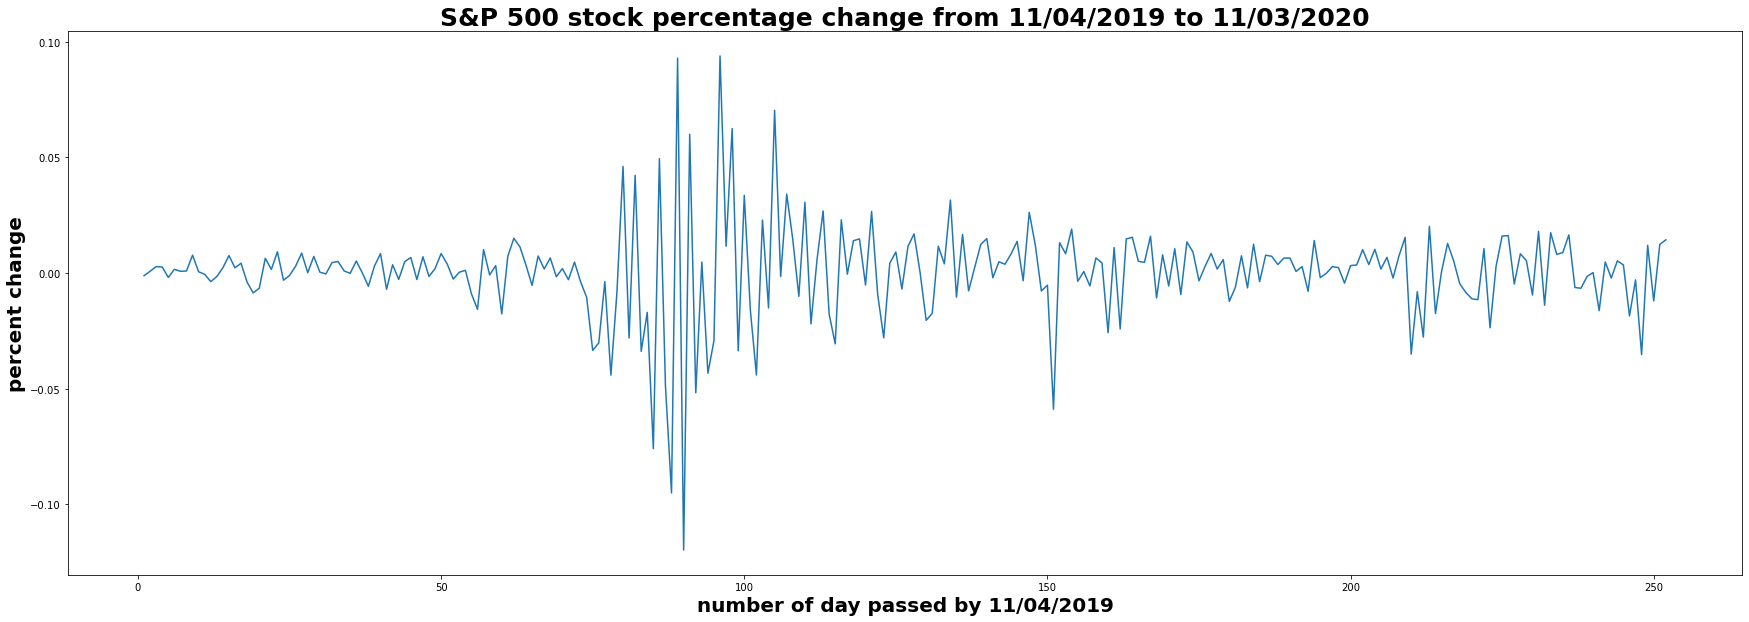

In [37]:
pct_SP500 = SP_df['Adj Close'].pct_change()
pct_dow = dow_df['Adj Close'].pct_change()

# now, Let's have a brief view of this percentage change graph
plt.plot(pct_SP500)

# note that stock market only open during weekday(Monday - Friday), there are only 253 days in a year. 
plt.xlabel("number of day passed by 11/04/2019", size=20, weight='bold')
plt.ylabel("percent change", size=20, weight='bold')
plt.rcParams["figure.figsize"] = [30,10]
plt.title("S&P 500 stock percentage change from 11/04/2019 to 11/03/2020", size=25, weight='bold')
plt.show()

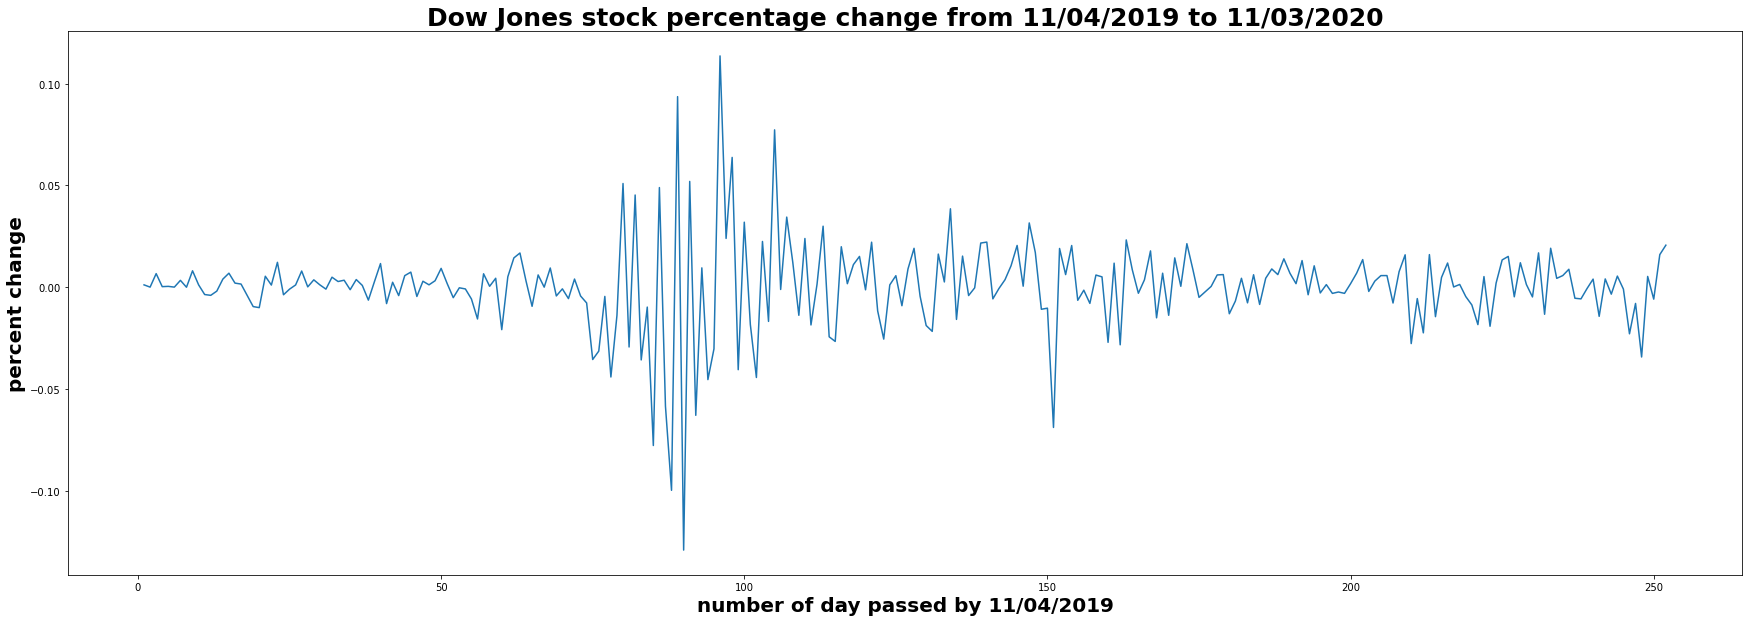

In [38]:
# now, Let's have a brief view of this percentage change graph
plt.plot(pct_dow)

# note that stock market only open during weekday(Monday - Friday), there are only 253 days in a year. 
plt.xlabel("number of day passed by 11/04/2019", size=20, weight='bold')
plt.ylabel("percent change", size=20, weight='bold')
plt.rcParams["figure.figsize"] = [30,10]
plt.title("Dow Jones stock percentage change from 11/04/2019 to 11/03/2020", size=25, weight='bold')
plt.show()

By looking at the percentage change above, it's clear to see these 2 stocks are extremely volatile after 2/5 of the graph, which is exactly when the covid started. This indicates that COVID had a great impact on the stock market, but we want to analyze further whether it has a positive or negative impact on the stock market. 

So now, we want to compare the stock market before the covid and after the covid period. In order to do so, I will first find the date that the US has the first COVID case confirmed, which is 2/26/2020. And then split the data into half and compare to see how stock price change due to COVID

In [39]:
# we get that 2020-02-26 is at index 77 of dataframe
SP_df.loc[SP_df['Date'] == '2020-02-26']

,Date,Open,High,Low,Close,Adj Close,Volume
77,2020-02-26,3139.899902,3182.51001,3108.98999,3116.389893,3116.389893,5478110000


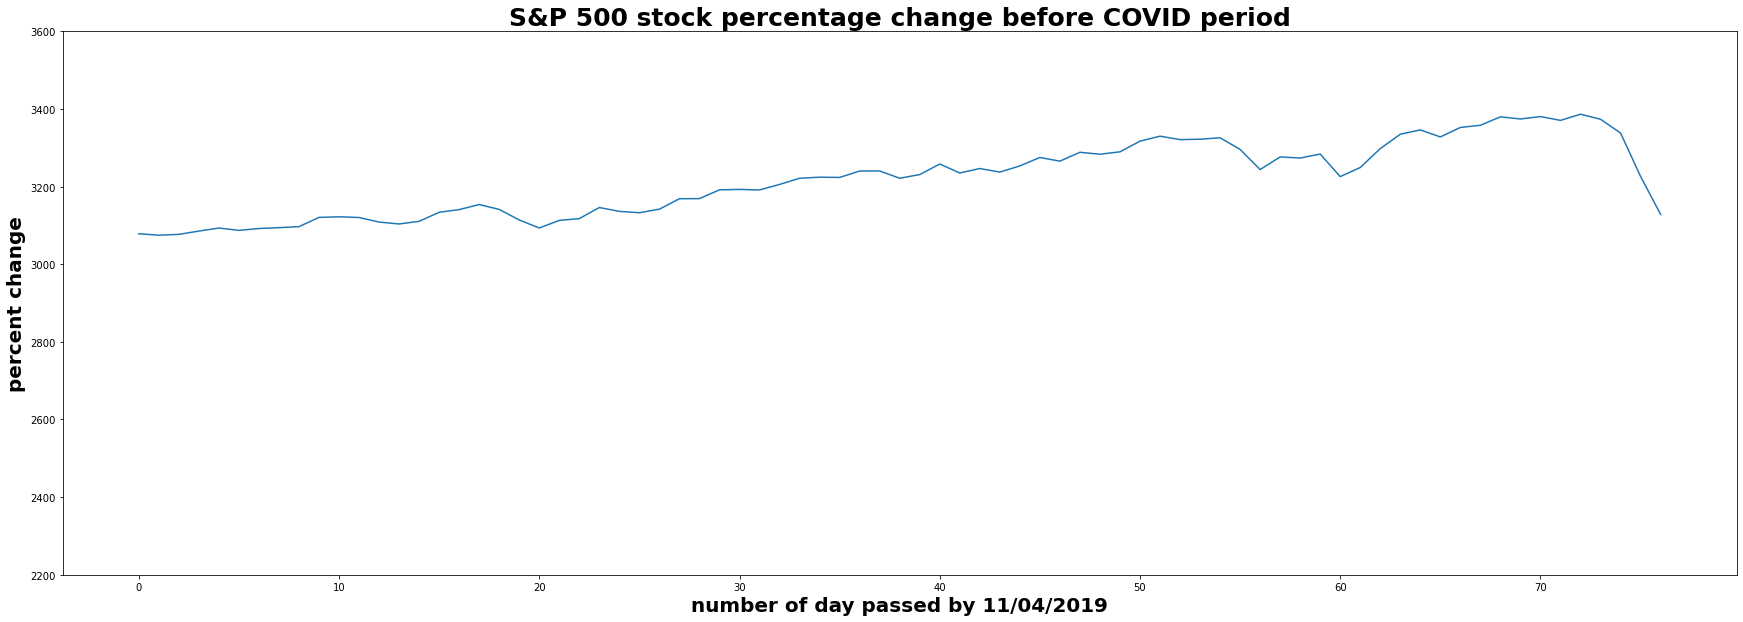

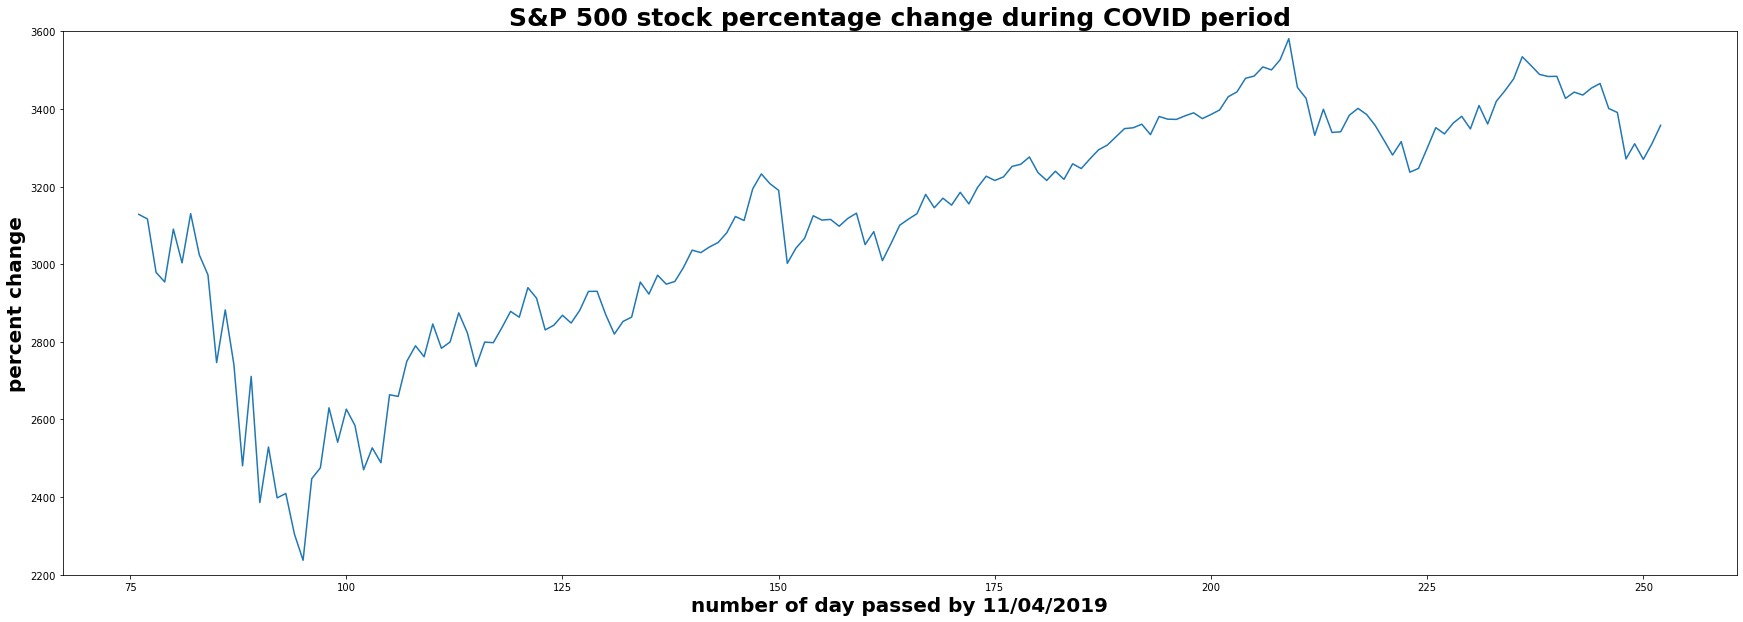

In [40]:
before_covid = SP_df.head(77)
during_covid = SP_df.tail(177)
plt.plot(before_covid['Adj Close'])

# note that stock market only open during weekday(Monday - Friday), there are only 253 days in a year. 
plt.xlabel("number of day passed by 11/04/2019", size=20, weight='bold')
plt.ylabel("percent change", size=20, weight='bold')
plt.rcParams["figure.figsize"] = [30,10]
plt.ylim((2200,3600))
plt.title("S&P 500 stock percentage change before COVID period", size=25, weight='bold')
plt.show()

plt.plot(during_covid['Adj Close'])

# note that stock market only open during weekday(Monday - Friday), there are only 253 days in a year. 
plt.xlabel("number of day passed by 11/04/2019", size=20, weight='bold')
plt.ylabel("percent change", size=20, weight='bold')
plt.rcParams["figure.figsize"] = [30,10]
plt.ylim((2200,3600))
plt.title("S&P 500 stock percentage change during COVID period", size=25, weight='bold')
plt.show()

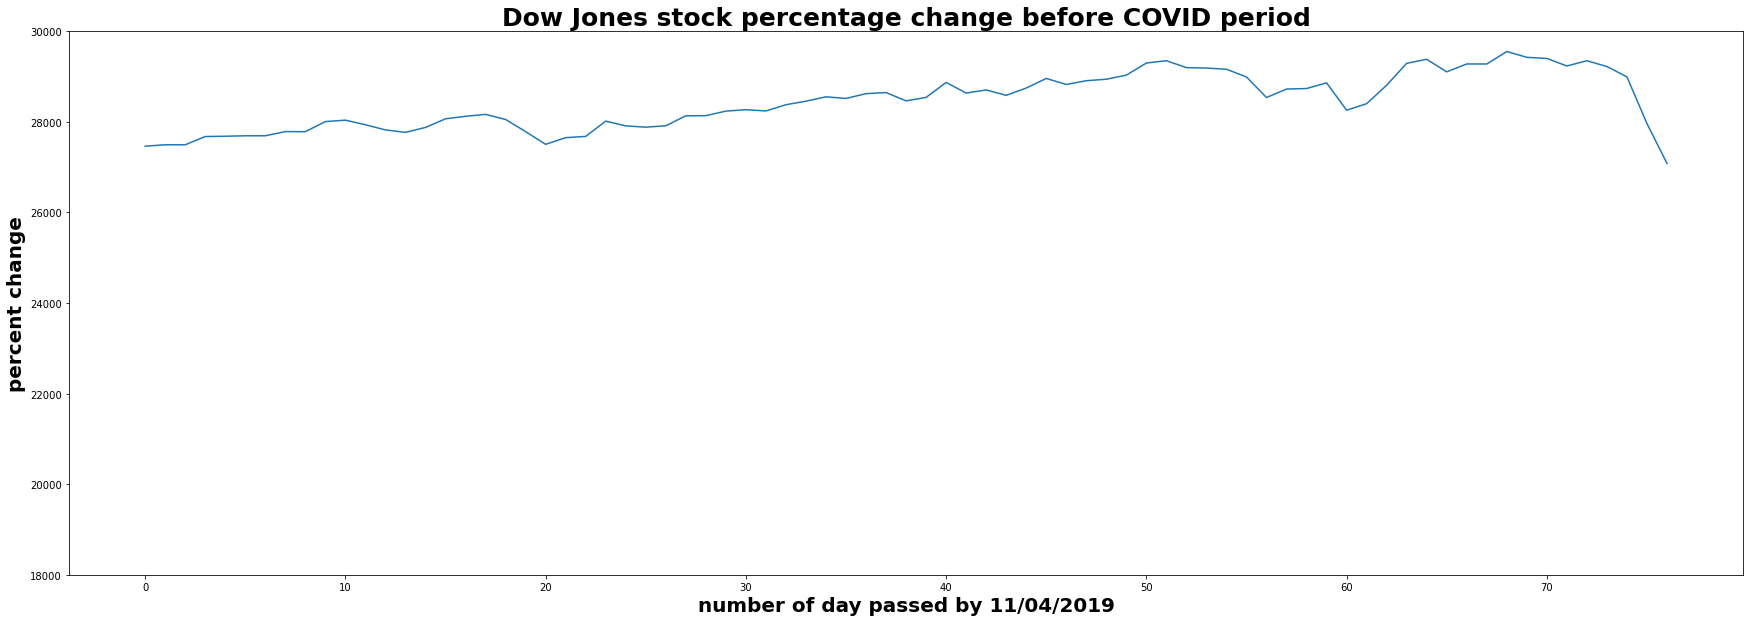

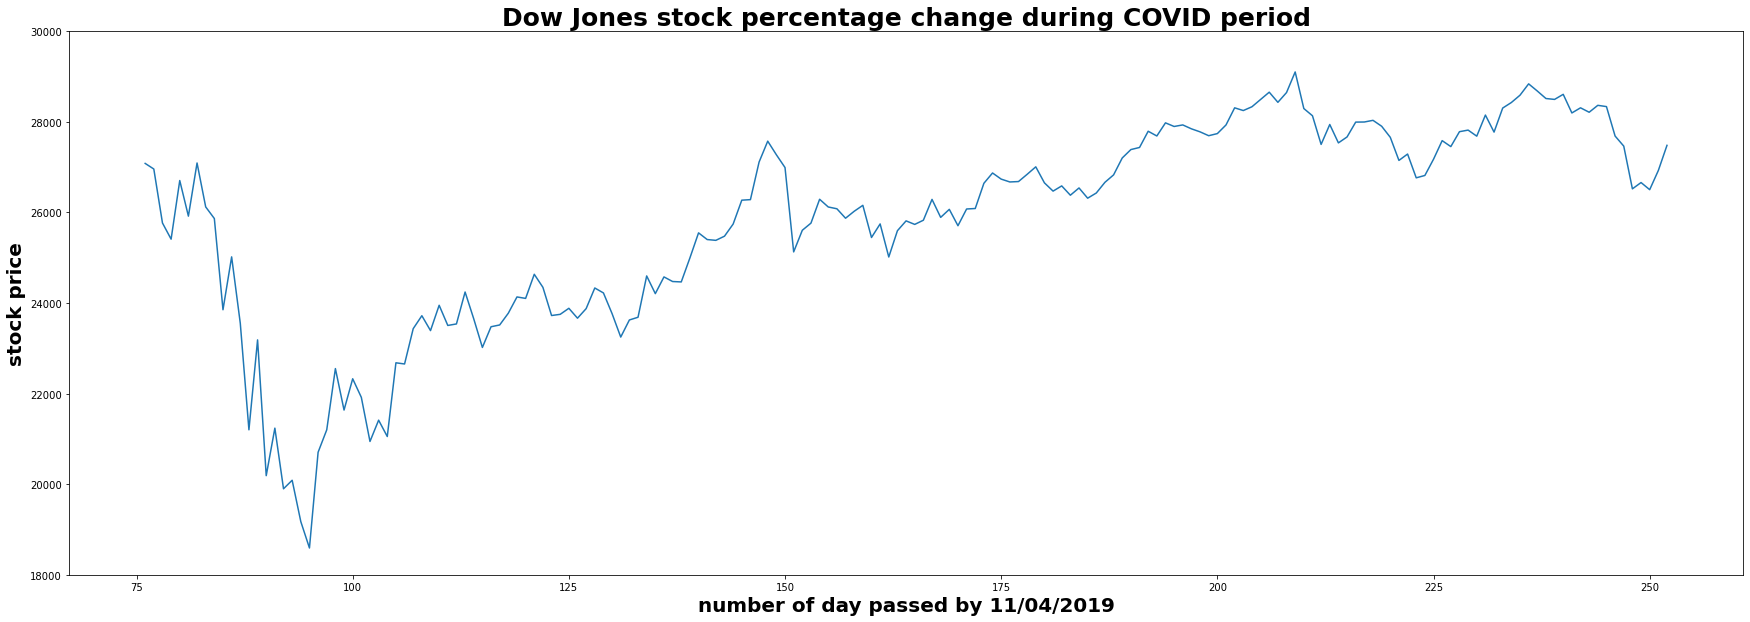

In [41]:
before_covid_dow = dow_df.head(77)
during_covid_dow = dow_df.tail(177)

plt.plot(before_covid_dow['Adj Close'])

# note that stock market only open during weekday(Monday - Friday), there are only 253 days in a year. 
plt.xlabel("number of day passed by 11/04/2019", size=20, weight='bold')
plt.ylabel("percent change", size=20, weight='bold')
plt.rcParams["figure.figsize"] = [30,10]
plt.ylim((18000,30000))
plt.title("Dow Jones stock percentage change before COVID period", size=25, weight='bold')
plt.show()

plt.plot(during_covid_dow['Adj Close'])

# note that stock market only open during weekday(Monday - Friday), there are only 253 days in a year. 
plt.xlabel("number of day passed by 11/04/2019", size=20, weight='bold')
plt.ylabel("stock price", size=20, weight='bold')
plt.rcParams["figure.figsize"] = [30,10]
plt.ylim((18000,30000))
plt.title("Dow Jones stock percentage change during COVID period", size=25, weight='bold')
plt.show()

First, let's look at before COVID period for both stocks. The general trend for both stocks was increasing slowly. However, at the beginning of the COVID period, both stocks had experienced significant decreases! This means that the first detection of the COVID case had caused a huge panic in the stock market, which leads to dramatically decrease for both the S&P 500 and Dow Jones. Although both stock prices are slowing going back to their peak, it's still obvious to show that COVID had brought a huge negative impact on the stock market, especially during late March and early April. And COVID is one of the factors that affects the stock market.